# Data Bagging


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

reading the data 

In [2]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


splitting it into test and trainning data

In [3]:
X = df.iloc[:, 1:785].values
y = df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

Trainning the model

In [4]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=20, max_samples=0.4, max_features=1.0, oob_score=True, random_state=0)
clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.4, n_estimators=20, n_jobs=1, oob_score=True,
         random_state=0, verbose=0, warm_start=False)

In [5]:
clf.oob_score_

0.9288095238095239

Applying the model on the test data

In [6]:
predicted = clf.predict(X_test)
expected = y_test
print(predicted[0:50])
print(expected[0:50])

[3 6 9 5 6 5 6 0 0 1 7 1 5 7 8 1 1 5 9 6 9 2 2 8 4 6 2 5 4 4 8 2 8 9 3 8 4
 5 2 7 6 3 1 7 9 7 4 2 5 0]
[3 6 9 5 6 5 6 0 0 1 7 1 5 7 8 1 1 5 9 6 9 2 2 8 4 6 2 5 4 4 8 2 8 9 3 8 4
 5 2 7 6 3 1 7 9 7 4 2 5 0]


**Measuring the performace of the model**

In [7]:
print("Accuracy:", clf.score(X_test, y_test))

('Accuracy:', 0.9380952380952381)


In [8]:
print("confusion_matrix:")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))


confusion_matrix:
[[786   0   1   3   1   7   4   1   8   2]
 [  0 943   7   5   0   3   0   0   3   0]
 [  7   2 811   5   4   3   8   7   9   4]
 [  5   4  14 788   2  21   2  11  13   3]
 [  3   4   4   0 772   1   6   2   6  29]
 [ 11   2   2  21   2 699   7   4   7   1]
 [  5   0   2   0   4  12 803   1  14   0]
 [  1   6  16   4   4   2   0 853   2  11]
 [  2  11   8  16   6  13  11   2 682  17]
 [  7   2   2  11  13   6   5  12  11 743]]


In [9]:
print("Classification report:")
from sklearn.metrics import classification_report 
print(classification_report(y_test, predicted))

Classification report:
             precision    recall  f1-score   support

          0       0.95      0.97      0.96       813
          1       0.97      0.98      0.97       961
          2       0.94      0.94      0.94       860
          3       0.92      0.91      0.92       863
          4       0.96      0.93      0.94       827
          5       0.91      0.92      0.92       756
          6       0.95      0.95      0.95       841
          7       0.96      0.95      0.95       899
          8       0.90      0.89      0.90       768
          9       0.92      0.92      0.92       812

avg / total       0.94      0.94      0.94      8400



**Parallele plots**

In [10]:
prediction_proba = clf.predict_proba(X_test)

In [11]:
prediction_df = pd.DataFrame(data=prediction_proba, columns=range(10))
prediction_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.9,0.0,0.10,0.0,0.00,0.0,0.0
1,0.0,0.0,0.1,0.0,0.0,0.00,0.9,0.00,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.95,0.0,0.05,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.00,0.0,0.0


In [21]:
prediction_df["class"] = predicted
prediction_df.head()

,0,1,2,3,4,5,6,7,8,9,class
0,0.0,0.0,0.0,0.9,0.0,0.10,0.0,0.00,0.0,0.0,3
1,0.0,0.0,0.1,0.0,0.0,0.00,0.9,0.00,0.0,0.0,6
2,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,1.0,9
3,0.0,0.0,0.0,0.0,0.0,0.95,0.0,0.05,0.0,0.0,5
4,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.00,0.0,0.0,6


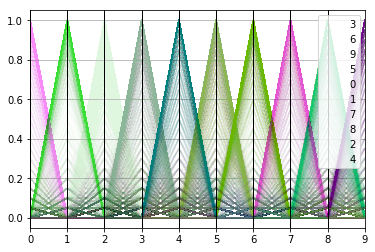

In [27]:
# libraries
from pandas.plotting import parallel_coordinates
plt.figure()
parallel_coordinates(prediction_df, 'class', alpha=0.01) 



**Learning Curve**

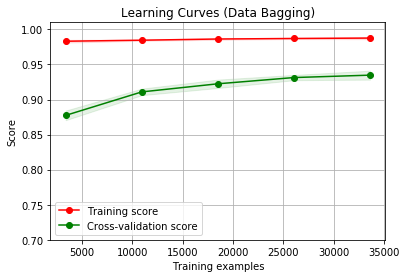

In [13]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    title : string
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
    Target relative to X for classification or regression;
    None for unsupervised learning.
    ylim : tuple, shape (ymin, ymax), optional
            Defines minimum and maximum yvalues plotted.
        cv : int, cross-validation generator or an iterable, optional
            Determines the cross-validation splitting strategy.
            Possible inputs for cv are:
              - None, to use the default 3-fold cross-validation,
              - integer, to specify the number of folds.
              - An object to be used as a cross-validation generator.
              - An iterable yielding train/test splits.
            For integer/None inputs, if ``y`` is binary or multiclass,
            :class:`StratifiedKFold` used. If the estimator is not a classifier
            or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.
            Refer :ref:`User Guide <cross_validation>` for the various
            cross-validators that can be used here.
        n_jobs : integer, optional
            Number of jobs to run in parallel (default 1).
    """
    
    
    plt.figure() 
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt
    
title = "Learning Curves (Data Bagging)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set. cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = clf
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()
    

**Viewing the the ones that predicted wrong**

In [112]:
(y_test != predicted).sum()

520

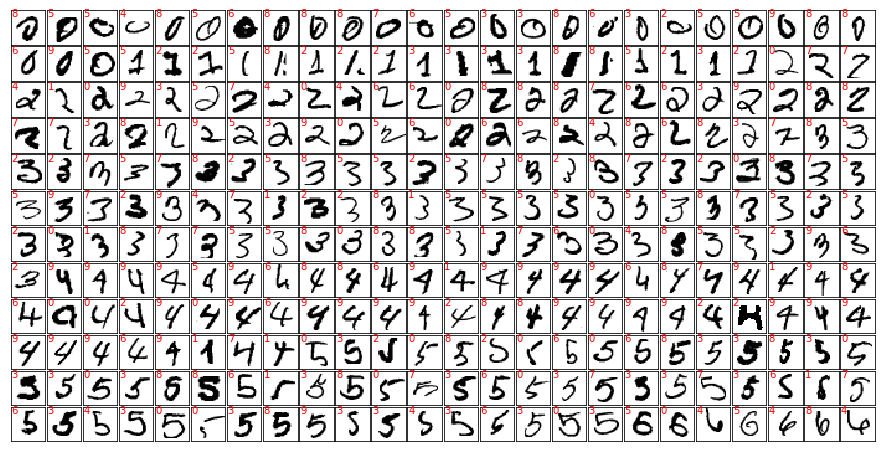

In [121]:
wrong = X_test[y_test != predicted]
wrong_pred = predicted[y_test != predicted]
wrong_exp = y_test[y_test != predicted]

fig = plt.figure(figsize=(12, 12))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

#sorting the output by number to make them easy to v
index_sort = wrong_exp.argsort()

# plot the digits: each image is 28x28 pixels
for i in range(288):
    ax = fig.add_subplot(24, 24, i + 1, xticks=[], yticks=[])
    ax.imshow(wrong[index_sort].reshape(-1, 28, 28)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    ax.text(0, 5, str(wrong_pred[index_sort][i]), color='red')
    
    # label the image with the target value
    #if predicted[i] == expected[i]:
    #    ax.text(0, 7, str(predicted[i]), color='green')
    #else:
    #    ax.text(0, 7, str(predicted[i]), color='red')


*Viewing the prediction of each number individually*

In [117]:
# a function that show the images of a particular number and predictions of this number       
def view_number_predictions(number, X_test, y_test, y_pred):
    num_test_data = X_test[y_test == number]
    num_predicted = y_pred[y_test == number]
    
    fig = plt.figure(figsize=(12, 12))  # figure size in inches
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    # plot the digits: each image is 28x28 pixels
    for i in range(288):
        ax = fig.add_subplot(24, 24, i + 1, xticks=[], yticks=[])
        ax.imshow(num_test_data.reshape(-1, 28, 28)[i], cmap=plt.cm.binary,
                  interpolation='nearest')

        # label the image with the target value
        if num_predicted[i] == number:
            ax.text(0, 5, str(num_predicted[i]), color='green')
        else:
            ax.text(0, 5, str(num_predicted[i]), color='red')


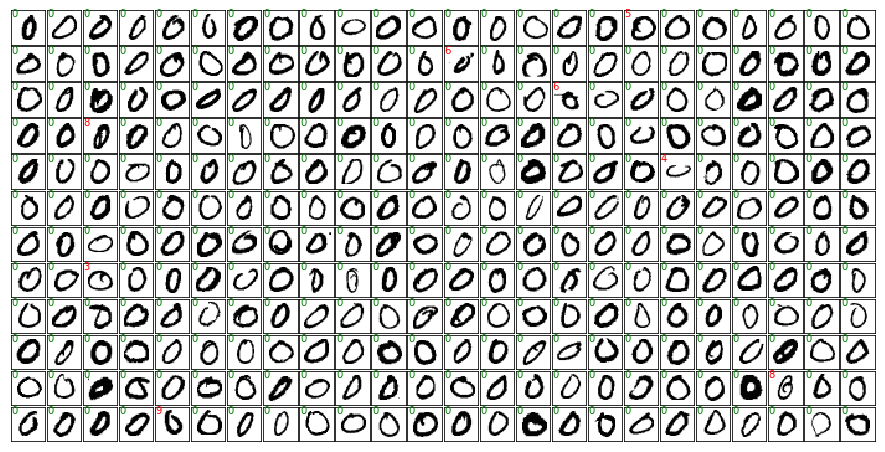

In [118]:
view_number_predictions(0, X_test, y_test, predicted)

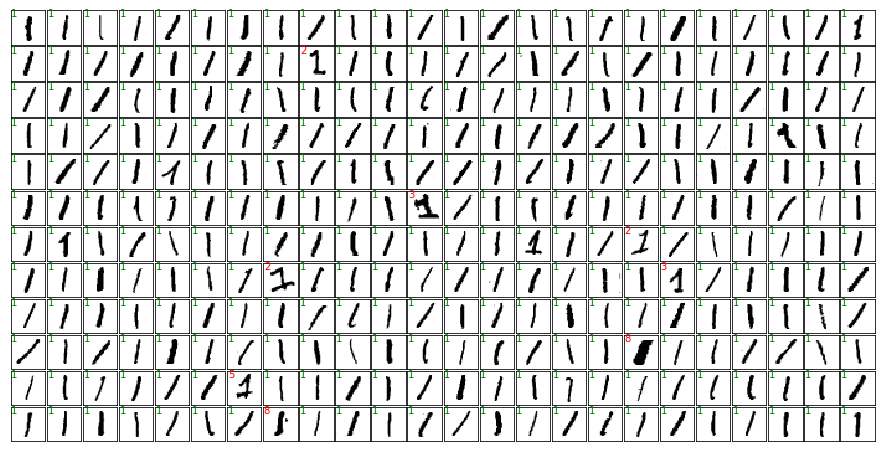

In [119]:
view_number_predictions(1, X_test, y_test, predicted)

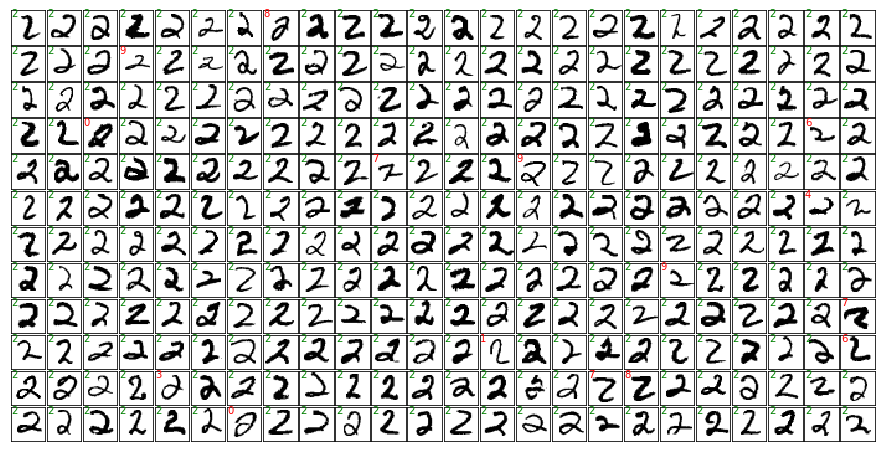

In [120]:
view_number_predictions(2, X_test, y_test, predicted)

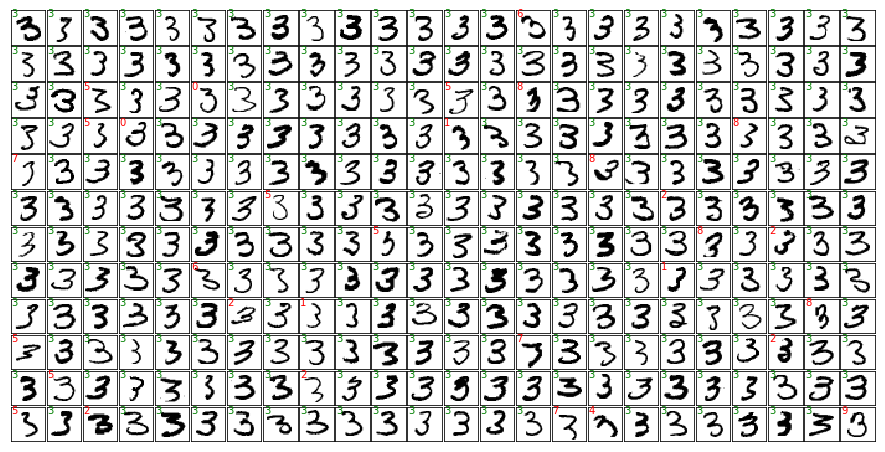

In [122]:
view_number_predictions(3, X_test, y_test, predicted)

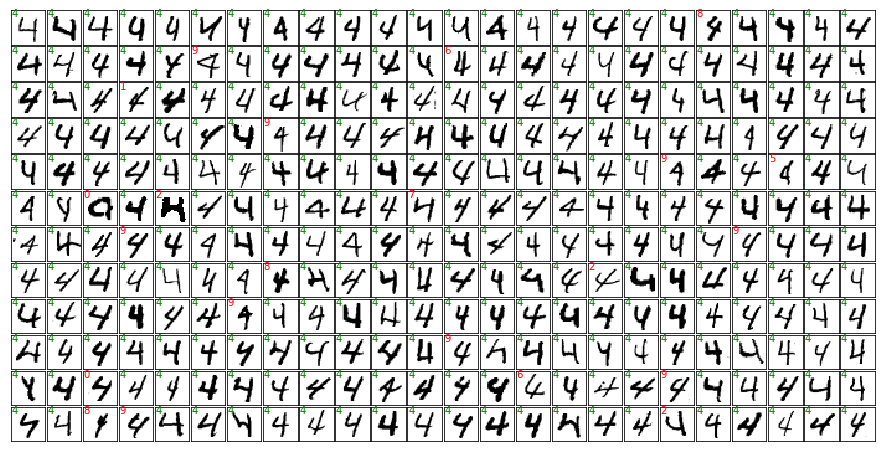

In [124]:
view_number_predictions(4, X_test, y_test, predicted)

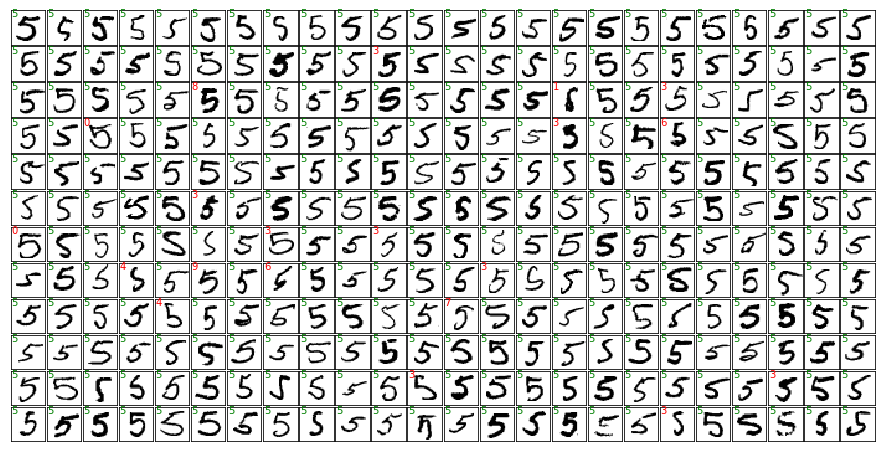

In [125]:
view_number_predictions(5, X_test, y_test, predicted)

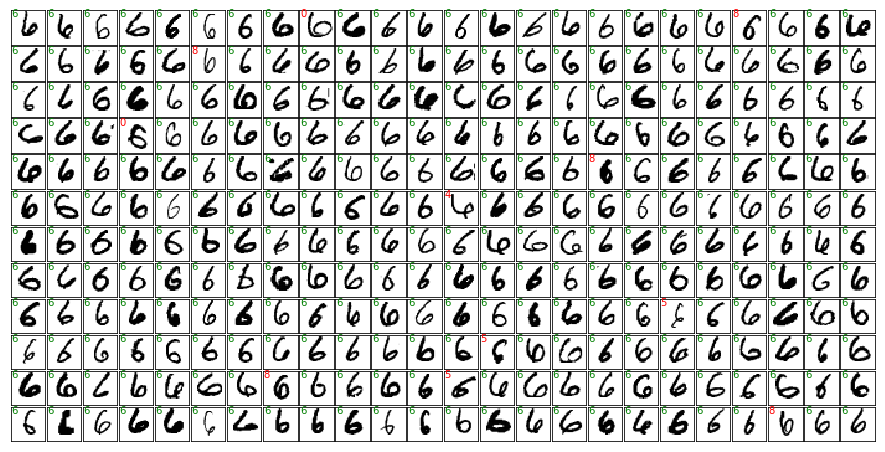

In [126]:
view_number_predictions(6, X_test, y_test, predicted)

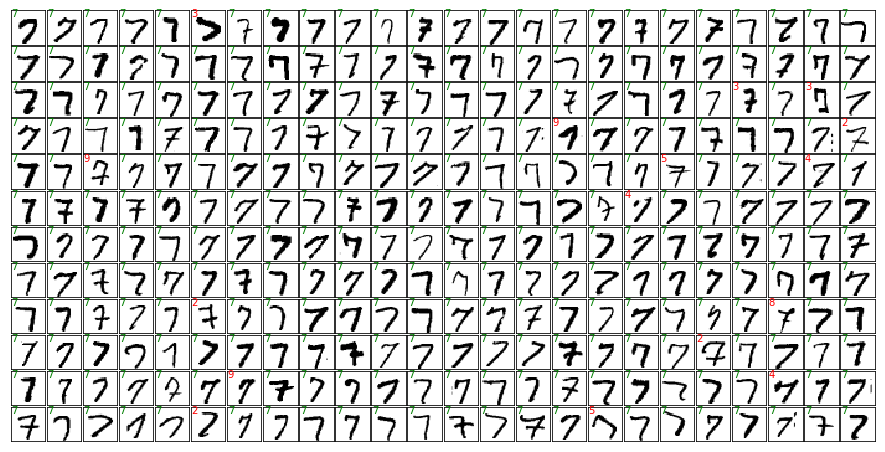

In [127]:
view_number_predictions(7, X_test, y_test, predicted)

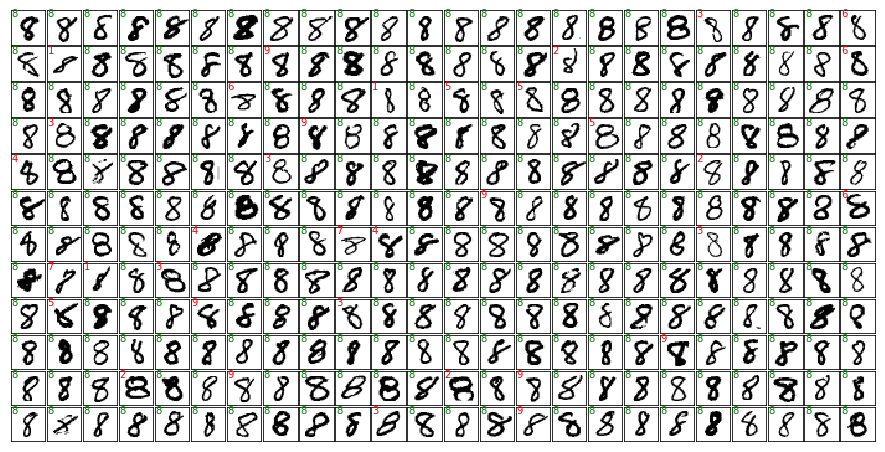

In [128]:
view_number_predictions(8, X_test, y_test, predicted)

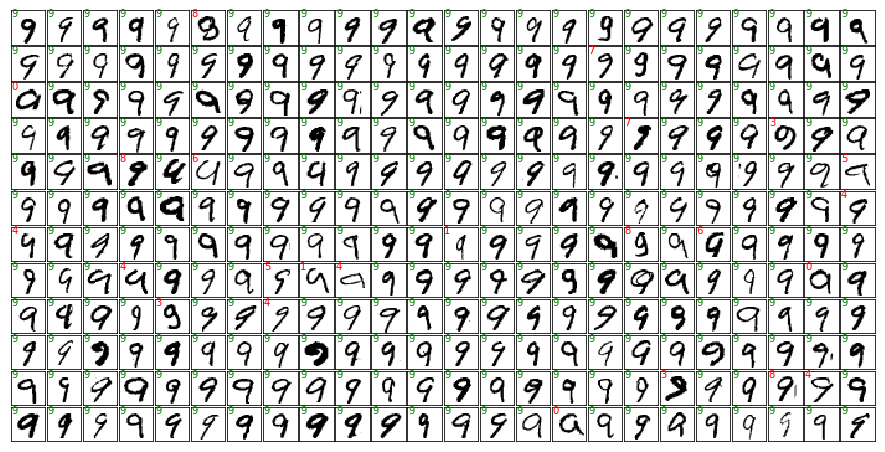

In [130]:
view_number_predictions(9, X_test, y_test, predicted)

**Parallele Plots**